# Install Dependencies and Setup


In [ ]:
%pip install torchvision ipdb

# Import Libraries


In [ ]:
import os
import cv2
import imghdr
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import random_split
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Remove dodgy images


In [ ]:
!rm - rf People/.ipynb_checkpoints

data_dir = 'People'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}')
            os.remove(image_path)

# Load Dataset

In [ ]:

transform = transforms.Compose(
    [
        transforms.ToTensor(), # Convert the image to pytorvh tensor
        # normalize the colors of the pixels to reduce the effect of differences in color intensity across images.
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        transforms.Resize((256,256)) # Use fixed size for all the pictures.
     ])

dataset = torchvision.datasets.ImageFolder(data_dir, transform=transform)


# Split the data into Train set and Test set


In [ ]:
dataset_train, dataset_test = random_split(dataset, (0.7,0.3))
len(dataset_train), len(dataset_test)

batch_size = 1

trainloader = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

# Test yourself


tensor(2)


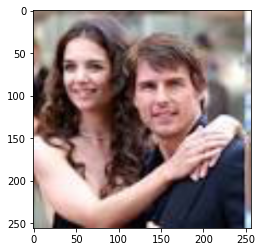

In [ ]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# print labels
#  0 = Donald Trump, 1 = Jennifer Aniston, 2 = Tom Cruise.
print(labels[0])

# Show image
imshow(torchvision.utils.make_grid(images))

# Basic NN
First, we tried using a basic CNN network. Unfortunalty, we got to 57% accuracy and could not improve.. 
Our model consists of two convolutional layers followed by three fully connected (linear) layers. The convolutional layers use 5x5 filters and MaxPool2d to reduce the spatial dimensions of the feature maps. The fully connected layers have 120, 84, and 10 output features, respectively.

In [ ]:
# import torch.nn as nn
# import torch.nn.functional as F


# class Net(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(59536, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = torch.flatten(x, 1)  # flatten all dimensions except batch
#         # print(x.shape)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x


# net = Net()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

# Pre-Trained ResNet18 

In [ ]:
import torchvision
from torch import nn # a framework for building neural networks.


# an instance of the ResNet-18 model architecture, a popular convolutional neural network (CNN) for image classification tasks, with pre-trained weights from the ImageNet dataset
net = torchvision.models.resnet18(weights='IMAGENET1K_V1')

# replaces the last layer of the ResNet-18 model, which is a fully connected layer with 1000 output nodes(corresponding to the 1000 ImageNet classes), with a new fully connected layer with 3 output nodes(corresponding to the 3 classes in the new classification task).
net.fc = nn.Linear(in_features=512, out_features=3)
net

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Training The Model

In [ ]:

criterion = nn.CrossEntropyLoss() # Define the loss function
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # Will be used to update the weights during training


for epoch in range(20):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
      
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


Finished Training


# Test the results

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy {100 * correct // total} %')

Accuracy 90 %
